In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import src
from testingUtils import testing_main as tm
import matplotlib.pyplot as plt
import numpy as np


import src
from src.nc4.BJDSprialScan import processExpSprialScans, spiralPlotter
# import matplotlib as mp
# mpl.use('TkAgg')
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
HOME_DIR, BASE_DIR, CODE_DIR, TB_DIR, RMS_DATA_DIR = src.config.config_paths()

# Grinding Parameter Variation

- A brief look into the effect of changing both feed rate and spindle speed on AE signals
- With a new D1.3 #1000 DCB 17 cuts were done:
    1. 5 cuts at default parameters (60 mm/min, 24000 rpm)
    2. 3 cuts @ 80% feed rate
    3. 3 cuts @ 60% feed rate
    4. 3 cuts @ 80% spindle speed
    5. 3 cuts @ 60% spindle speed

In [3]:
exp = src.load('Test 33')

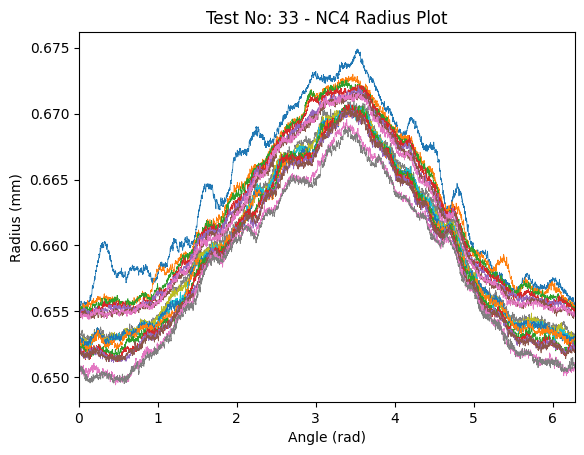

In [186]:
fig = exp.nc4.plot_xy()

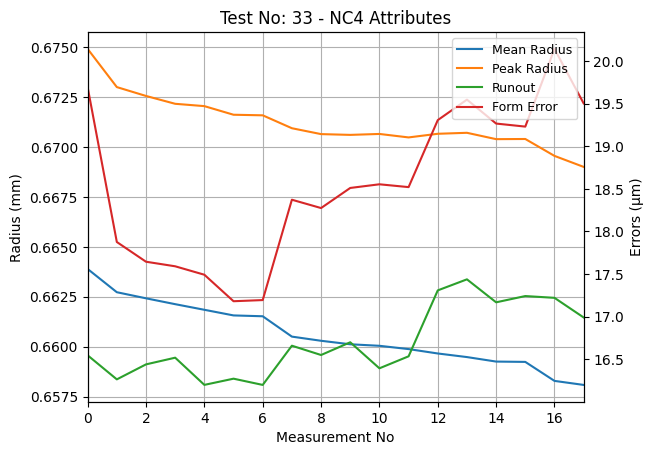

In [6]:
fig = exp.nc4.plot_att()

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: xlabel='Cut No.', ylabel='Measured relative surface position (mm)'>)

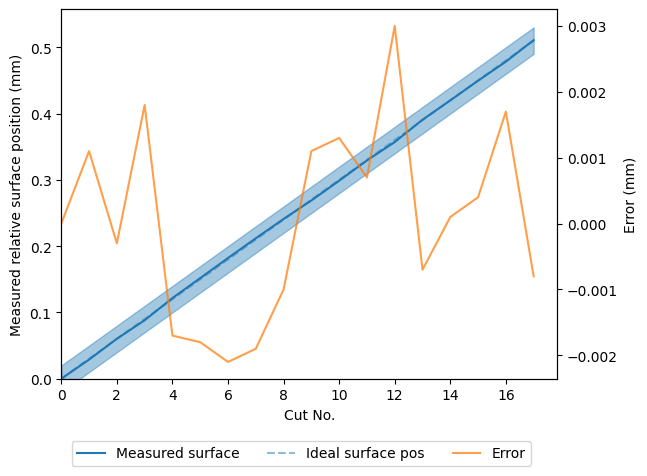

In [187]:
exp.probe.plot_probe_DOC()

In [19]:
aeSigs = [exp.ae.readAE(i) for i in range(len(exp.ae._files))]

Text(0.5, 0.98, 'AE Signals at different spindle speeds')

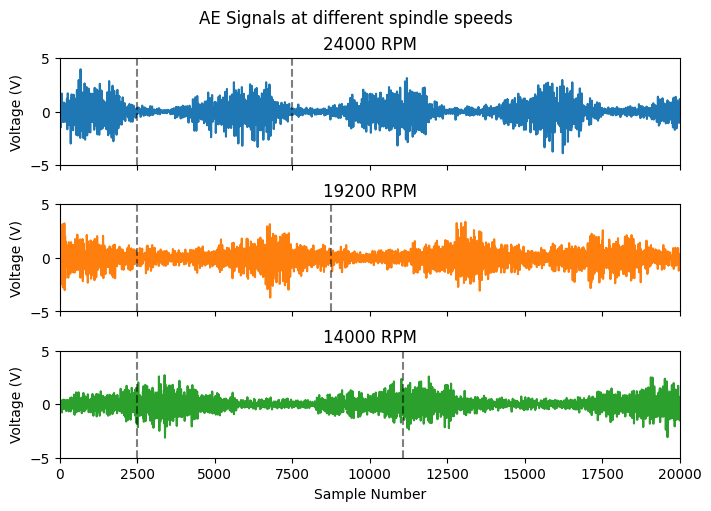

In [189]:
fig, ax = plt.subplots(3, 1, figsize=(7, 5), sharex=True, constrained_layout=True)
ax[0].plot(aeSigs[3][6_000_000:6_020_000], color='C0')
ax[1].plot(aeSigs[11][6_000_000:6_020_000], color='C1')
ax[2].plot(aeSigs[14][6_000_000:6_020_000], color='C2')
for _ax in ax:
    _ax.set_xlim(0, 20_000)
    _ax.set_ylim(-5, 5)
    _ax.set_ylabel('Voltage (V)')
ax[2].set_xlabel('Sample Number')
ax[0].set_title('24000 RPM')
ax[1].set_title('19200 RPM')
ax[2].set_title('14000 RPM')

ax[0].vlines([2500, 7500], -5, 5, color='k', linestyle='--', alpha=0.5)
ax[1].vlines([2500, (2500 + 6250)], -5, 5, color='k', linestyle='--', alpha=0.5)
ax[2].vlines([2500, (2500 + 8571)], -5, 5, color='k', linestyle='--', alpha=0.5)
fig.suptitle('AE Signals at different spindle speeds')


Text(0.5, 0.98, 'AE Signals at different feed rates')

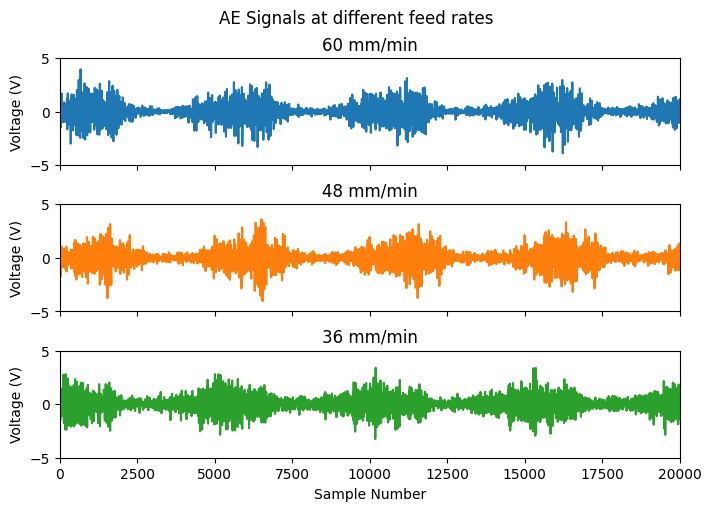

In [188]:
fig, ax = plt.subplots(3, 1, figsize=(7, 5), sharex=True, constrained_layout=True)
ax[0].plot(aeSigs[3][6_000_000:6_020_000], color='C0')
ax[1].plot(aeSigs[5][6_000_000:6_020_000], color='C1')
ax[2].plot(aeSigs[8][6_000_000:6_020_000], color='C2')
for _ax in ax:
    _ax.set_xlim(0, 20_000)
    _ax.set_ylim(-5, 5)
    _ax.set_ylabel('Voltage (V)')
ax[2].set_xlabel('Sample Number')
ax[0].set_title('60 mm/min')
ax[1].set_title('48 mm/min')
ax[2].set_title('36 mm/min')

# ax[0].vlines([2500, 7500], -5, 5, color='k', linestyle='--', alpha=0.5)
# ax[1].vlines([2500, (2500 + 6250)], -5, 5, color='k', linestyle='--', alpha=0.5)
# ax[2].vlines([2500, (2500 + 8571)], -5, 5, color='k', linestyle='--', alpha=0.5)
fig.suptitle('AE Signals at different feed rates')

Text(0, 0.5, 'Magnitude (dB)')

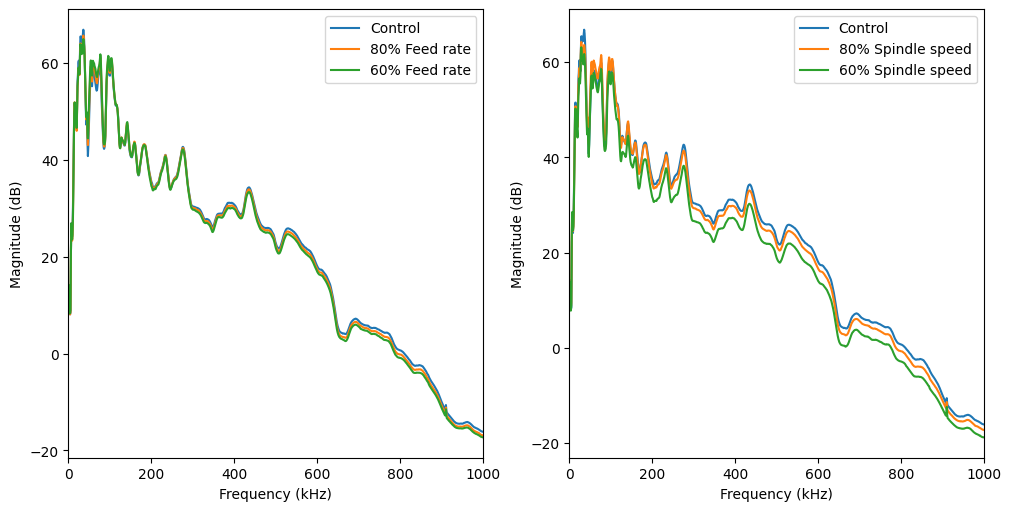

In [197]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, constrained_layout=True)
ax[0].plot(np.mean(exp.ae.fft[1000][1:5], axis=0), label='Control')
ax[0].plot(np.mean(exp.ae.fft[1000][5:8], axis=0), label='80% Feed rate')
ax[0].plot(np.mean(exp.ae.fft[1000][8:11], axis=0), label='60% Feed rate')

ax[0].legend()

ax[0].set_xlim(0, 1000)
ax[0].set_xlabel('Frequency (kHz)')
ax[0].set_ylabel('Magnitude (dB)')

ax[1].plot(np.mean(exp.ae.fft[1000][1:5], axis=0), label='Control')
ax[1].plot(np.mean(exp.ae.fft[1000][11:14], axis=0), label='80% Spindle speed')
ax[1].plot(np.mean(exp.ae.fft[1000][14:], axis=0), label='60% Spindle speed')

ax[1].legend()

ax[1].set_xlim(0, 1000)
# ax[1].set_xlim(0, 200)
ax[1].set_xlabel('Frequency (kHz)')
ax[1].set_ylabel('Magnitude (dB)')

In [ ]:
exp.features.head()

,RMS,Kurtosis,Amplitude,Skewness,Freq 10 kHz,Freq 35 kHz,Freq 134 kHz,Mean radius,Peak radius,Radius diff,Runout,Form error,Avg probe,Probe diff
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.663891,0.674911,NaN,0.016545,0.019692,0.0000,0.0000
1,0.823376,31.242961,23.593416,-0.091281,33.483614,64.120024,42.989594,0.662727,0.672999,-0.001164,0.016263,0.017876,0.0289,0.0289
2,0.680913,7.926506,7.884145,0.024292,24.598676,65.844377,41.521262,0.662422,0.672556,-0.000305,0.016439,0.017644,0.0603,0.0314
3,0.695639,6.229748,6.571397,0.014404,26.974512,66.602035,43.431371,0.662128,0.672163,-0.000294,0.016517,0.017590,0.0882,0.0279
4,0.681672,5.834412,6.117759,0.003360,26.546393,65.933105,43.718736,0.661847,0.672046,-0.000281,0.016198,0.017491,0.1217,0.0335


In [224]:
feature = 'Skewness'

Text(0, 0.5, 'Skewness')

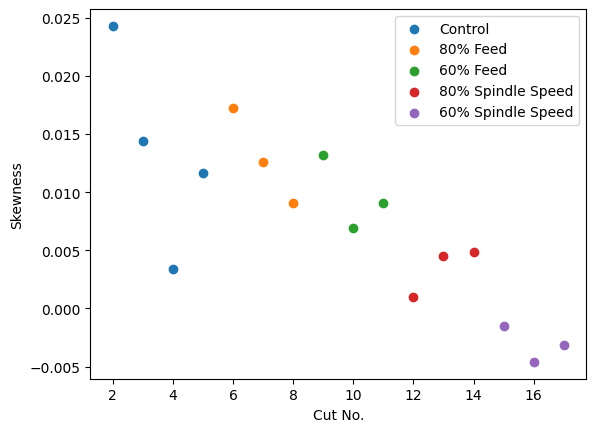

In [225]:
fig, ax = plt.subplots()
ax.scatter(x=exp.features.index[2:6], y=exp.features[feature][2:6], c='C0', label='Control')
ax.scatter(x=exp.features.index[6:9], y=exp.features[feature][6:9], c='C1', label='80% Feed')
ax.scatter(x=exp.features.index[9:12], y=exp.features[feature][9:12], c='C2', label='60% Feed')
ax.scatter(x=exp.features.index[12:15], y=exp.features[feature][12:15], c='C3', label='80% Spindle Speed')
ax.scatter(x=exp.features.index[15:18], y=exp.features[feature][15:18], c='C4', label='60% Spindle Speed')

ax.legend()
ax.set_xlabel('Cut No.')
ax.set_ylabel(f'{feature}')
# ax.set_ylim([0, 10])

Text(0, 0.5, 'Skewness')

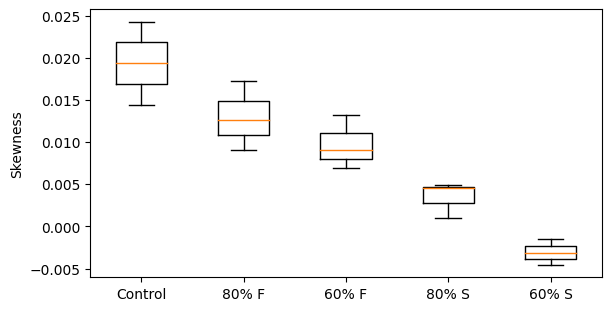

In [226]:
fig, ax = plt.subplots(figsize=(6, 3), constrained_layout=True)

data = [np.squeeze(exp.features[feature][2:4].values),
        np.squeeze(exp.features[feature][6:9].values),
        np.squeeze(exp.features[feature][9:12].values),
        np.squeeze(exp.features[feature][12:15].values),
        np.squeeze(exp.features[feature][15:18].values)]
ax.boxplot(data, labels=['Control', '80% F', '60% F', '80% S', '60% S']);
ax.set_ylabel(f'{feature}')

# ax.legend()
# ax.set_ylim([0, 10])